In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler

In [115]:
df=pd.read_csv('SPY.csv')
sample = df[['date','close']][:550].set_index('date')
window_size = 2
num_features = 1
train = sample[:500]
train_num = train.to_numpy().reshape(-1,1)
train_x = []
for index in range(len(train_num)-window_size):
    train_x.append(train_num[index:index+window_size])

train_x = np.array(train_x).reshape(-1,window_size*num_features)
#print(train_x)
train_y = train_num[train_num.shape[0]-train_x.shape[0]:].reshape(-1)

val = sample[500:520]
val_num = val.to_numpy().reshape(-1,1)
val_x = []
for index in range(len(val_num)-window_size):
    val_x.append(val_num[index:index+window_size])

val_x = np.array(val_x).reshape(-1,window_size*num_features)
val_y = val_num[val_num.shape[0]-val_x.shape[0]:].reshape(-1)

testing = sample[520:540]
testing_num = testing.to_numpy().reshape(-1,1)

testing_x = []
for index in range(len(testing_num)-window_size):
    testing_x.append(testing_num[index:index+window_size])

testing_x = np.array(testing_x).reshape(-1,window_size*num_features)
testing_y = testing_num[testing_num.shape[0]-testing_x.shape[0]:].reshape(-1)


In [116]:
reg = LinearRegression().fit(train_x, train_y)

In [117]:
y_hat_val = reg.predict(val_x)

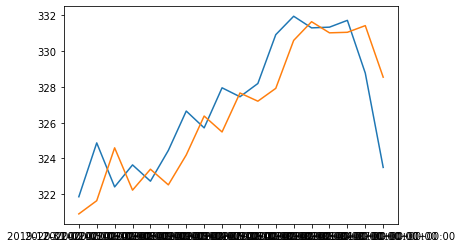

In [118]:
plt.plot(val.tail(val_y.shape[0]).index,val_y,label = 'Actual')
plt.plot(val.tail(val_y.shape[0]).index,y_hat_val,label = 'Predicted')

In [119]:
y_hat_test = reg.predict(testing_x)
#print(y_hat_test-testing_y)


In [120]:
x = np.array([[1,2,3,4],[5,6,7,8]])
Xy= np.hstack((x,x))
print(Xy) ################################adding features

[[1 2 3 4 1 2 3 4]
 [5 6 7 8 5 6 7 8]]


(498,)
(498, 2)


C:\Users\Ihsaan\anaconda3\envs\Good3.8\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


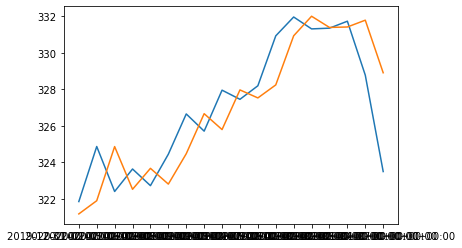

In [122]:
####################NEED to GRID SEARCH
####################Need to preprocess, use min max scaler to pre process x and y values to get rid of error
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR
#


clf = LinearSVR(random_state=0, tol=1e-5)
print(train_y.shape)
print(train_x.shape)
clf.fit(train_x, train_y)
y_clf_val = clf.predict(val_x)
plt.plot(val.tail(val_y.shape[0]).index,val_y,label = 'Actual')
plt.plot(val.tail(val_y.shape[0]).index,y_clf_val,label = 'Predicted')